In [36]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("./data/train.csv", index_col=0)

In [37]:
print(df.head())

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S

In [38]:
print(df.isna().sum())

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


<Axes: xlabel='Survived', ylabel='count'>

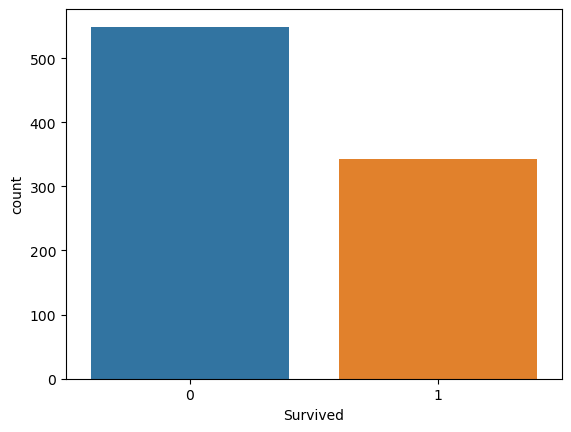

In [39]:
sns.countplot(x = df["Survived"])

<Axes: xlabel='Pclass', ylabel='count'>

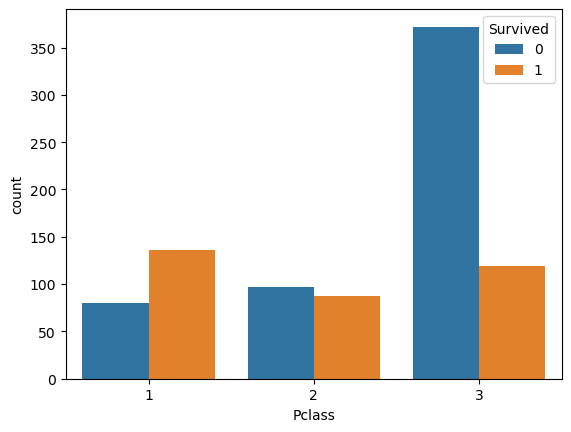

In [40]:
sns.countplot(x = df["Pclass"], hue = df["Survived"])

<Axes: xlabel='Pclass', ylabel='count'>

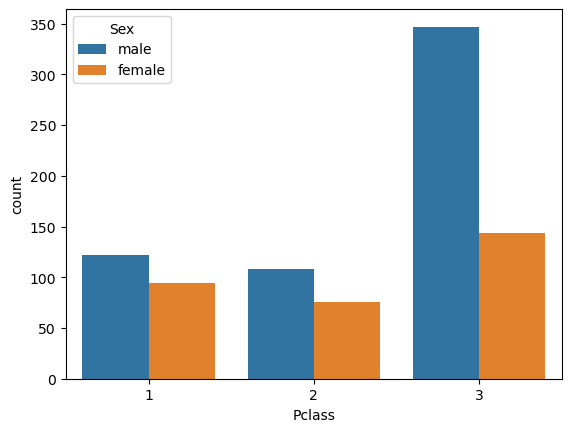

In [41]:
sns.countplot(x = df["Pclass"], hue = df["Sex"])

<Axes: xlabel='Age', ylabel='Count'>

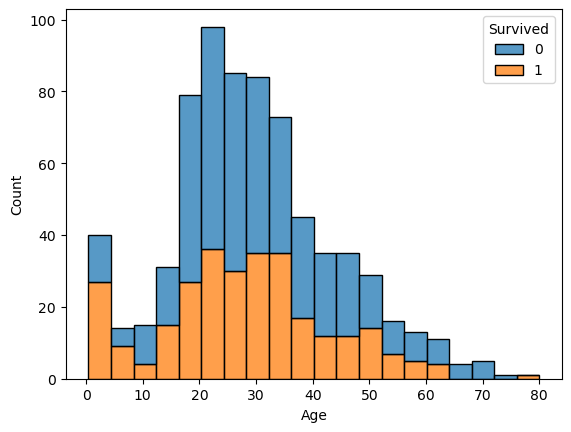

In [42]:
sns.histplot(data = df, multiple = "stack", x = "Age", hue = "Survived", legend = True)

In [43]:
print(df.groupby("Survived").Age.mean())
print(df[df["Survived"] == 0].Age.mean())
print(df[df["Survived"] == 1].Age.mean())

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64
30.62617924528302
28.343689655172415


In [44]:
df.loc[(df["Survived"] == 0) & pd.isna(df["Age"]), "Age"] = df[df["Survived"] == 0].Age.mean()
df.loc[(df["Survived"] == 1) & pd.isna(df["Age"]), "Age"] = df[df["Survived"] == 1].Age.mean()

In [45]:
print(df.groupby(["Survived", "Pclass", "Sex"]).size())

Survived  Pclass  Sex   
0         1       female      3
                  male       77
          2       female      6
                  male       91
          3       female     72
                  male      300
1         1       female     91
                  male       45
          2       female     70
                  male       17
          3       female     72
                  male       47
dtype: int64
